# Machine Learning 1 - Exercise Sheet 2

## Viktor Vironski (4330455), Andy Disser (5984875), Ngoc Anh Trung Pham (7176267)


Array containing the indices of clusters to which the points belong:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Array containing the coordinates of the final centroids:
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


C:\Users\ACER\AppData\Local\Temp/ipykernel_20392/3248200541.py:256: RuntimeWarning: invalid value encountered in subtract
  dist_matrix = np.sqrt(np.apply_over_axes(np.sum, np.power(data1-data2, 2), 2))


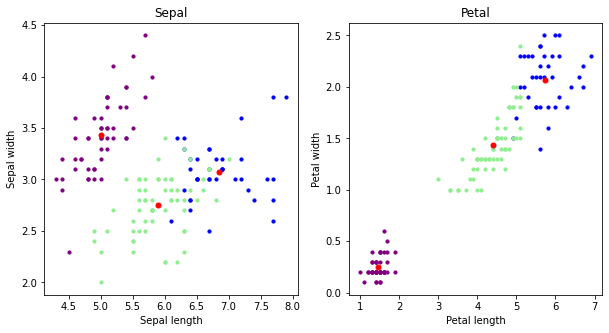

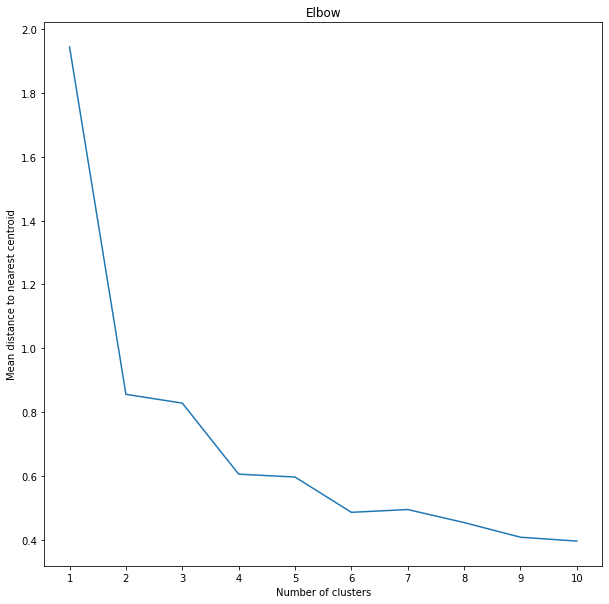

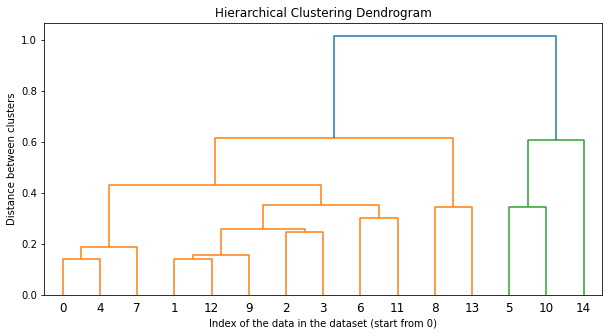

In [258]:
"""
Name - Matrikelnummer 
1) Pham, Ngoc Anh Trung - 7176267
2) Viktor Vironski - 4330455
3) Andy Disser - 5984875

Exercise Sheet 2
"""


from sklearn import datasets
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.cluster.hierarchy import dendrogram

# prevent numpy exponential notation on print 
np.set_printoptions(suppress=True)

# import iris dataset as iris
#iris = np.array(datasets.load_iris().data)

### Excercise 1.1
def kmeans(data, ncluster):
    # takes a dataset as input and uses the K-means algorithm to cluster with Euclidean distance the data 
    # intonclusterclusters and returns the respective cluster index for each data point aswell as the respective
    # centroid
    
    # k-means algorithm                                                          
    # 1 specify the number k of clusters to assign                               
    # 2 randomly initialize k centroids                                          
    # 3 repeat                                                                   
    # 4     expectation: assign each point to it's closest centroid              
    # 5     maximization: compute the new centroid (mean) of each cluster        
    # 6 until centroid positions do not change                                   
    
    
    # choose initial centroids at random from dataset
    centroids = choose_random_centroids(data, ncluster)
    
    # reshape dataset for broadcasting
    data_new = data.reshape(data.shape[0], 1, data.shape[1])
        
    # calculate eucledian distances from centroid to sample for each centroid
    # broacasting: data_new (#samples, 1, #variables), centroids (#centroids, #variables)
    # dimention of clusters (#samples, #centroids)
    clusters = np.linalg.norm(data_new - centroids, axis = 2)
    
    # recalculate clusters n number of times
    for i in range (1, 25):
        centroids = calculate_new_centroids(data_new, clusters)
        clusters = np.linalg.norm(data_new - centroids, axis = 2)
        
    # transform cluster array into 0-1-matrix for easier calculation of index array    
    clusters = calculate_index_matrix(clusters)
    
    return centroids, np.where(clusters == 1)[1]



def choose_random_centroids(data, k):
    
    # choose initial centroids    
    centroids = []
    
    # get random indices from the dataset
    random_indices = np.random.choice(len(data), size=k, replace=False)
    
    # fill centroid array with the chosen random samples as initial centroids
    for i in range(random_indices.size):
        
        random = random_indices[i]
        
        centroids.append(data[random])
    
    # return chosen centroids
    return np.array(centroids)



def calculate_new_centroids(data, clusters):
    
    # calculates a 0-1-matrix, where 1 means "samples is in cluster n" and 0 means "samples is not in cluster n"
    index_matrix = calculate_index_matrix(clusters)
    
    # reshape index matrix to use broadcasting
    # data (#samples, 1, #variables), index_matrix (#samples, #centroids, 1)
    # sample_cluster (#samples, #centroids, #variables)
    sample_in_cluster = data * index_matrix.reshape(index_matrix.shape[0], index_matrix.shape[1], 1)
    
    # calculate new centroids by calcluating the mean over all samples in a given cluster
    # new_centroids (#centroids, #variables)
    new_centroids = np.sum(sample_in_cluster, axis = 0) / np.count_nonzero(sample_in_cluster, axis = 0)

    return new_centroids


    
def calculate_index_matrix(matrix):
    
    # transform matrix to 0-1-matrix
    for i in range(0, matrix.shape[0]):
        min = np.amin(matrix[i])
        for j in range(0, matrix.shape[1]):
            if matrix[i][j] > min:
                matrix[i][j] = 0
            else:
                matrix[i][j] = 1
                
    return matrix
    


 


### Exercise 1.2
def optimal_number_of_clusters(data, max_number_of_clusters):
    
    # initialize an empty array
    mean_dist_for_kmeans = []
    
    for i in range(1, max_number_of_clusters + 1):
        
        # calculate kmeans for i clusters
        current = kmeans(data, i)
        # calculate mean distance from centroids from kmeans
        current_mean = mean_distance_from_centroid(data, current[0], current[1])
        
        mean_dist_for_kmeans.append(current_mean)
        
    return(mean_dist_for_kmeans)
        


def index_array_to_matrix(array):
    
    # transforms an index array into a (#samples)*(#clusters)-Matrix
    
    index_matrix = np.zeros((array.size, np.amax(array) + 1))
    
    for i in range (0, array.size):
        index_matrix[i][array[i]] = 1
        
    return(index_matrix)



def mean_distance_from_centroid(data, centroids, clusters):
    
    # takes the dataset, the calculated centroids and clusters and computes the mean distance of the data points
    # of a cluster to the respective centroid
    
    # calculate index matrix from index_array
    index_matrix = index_array_to_matrix(clusters)
    
    # calculates the euclidean distance from sample to the corresponding centroid, otherwise 0
    # reshape data for broadcasting: data_new (#samples, 1, #variables)
    # centroids shape (#centroids, #variables)
    # resulting eucl_distances shape (#samples, #centroids)
    # index matrix is also shaped (#samples, #centroids)
    # dist_from_corresponding_centroid is also shaped(#samples, #centroids)
    
    data_new = data.reshape(data.shape[0], 1, data.shape[1])
    eucl_distances = np.linalg.norm(data_new - centroids, axis = 2)
    dist_from_corresponding_centroid = eucl_distances*index_matrix
    
    # computes the mean over all clusters
    # mean_eucl_dist_from_centroid shape(#centroids)
    mean_eucl_dist_from_centroid = np.sum(dist_from_corresponding_centroid) / np.count_nonzero(dist_from_corresponding_centroid)
    
    return(mean_eucl_dist_from_centroid)



### Exercise 2

def get_points_of_cluster(linkage_matrix, row_index):
    """
    Recursive function which returns an array consisting of indices of original 
    points in the cluster with the given row index in the given linkage matrix.
    
    Inputs:
    - linkage_matrix : the linkage matrix
    - row_index : the row index of the cluster in linkage matrix

    Output:
    - array containing the indices of original points lying in this cluster
    """

    # Base case (If it was a cluster composed of two original points)
    if linkage_matrix[row_index, 3] == 2:
        return np.array([linkage_matrix[row_index, 0], linkage_matrix[row_index, 1]])

    else:  # General case
        
        n = linkage_matrix.shape[0] + 1   # The number of original points
        i = linkage_matrix[row_index, 0]  # The left subcluster
        j = linkage_matrix[row_index, 1]  # The right subcluster

        left_arr = np.array([linkage_matrix[row_index, 0]])
        right_arr = np.array([linkage_matrix[row_index, 1]])

        # If the subcluster i or j is not trivial (not a single-element-cluster)
        if (i >= n):
            left_arr = get_points_of_cluster(linkage_matrix, (i-n).astype(int))
        if (j >= n):
            right_arr = get_points_of_cluster(linkage_matrix, (j-n).astype(int))

        return np.concatenate([left_arr, right_arr])


def agglomerative_clustering(data):
    """
    Cluster the data using the agglomerative method.
    Distance is defined based on the distance between centroid.

    Inputs:
    data : the given dataset

    Outputs:
    - the linkage matrix
    """

    n = data.shape[0]
    k = 0
    
    # According to the format of the documentation. 
    linkage_matrix = np.zeros((n-1, 4))

    # A copied of the main data to work with.
    worked_data = copy.deepcopy(data)
    
    # Array counting the original observations in each newly formed cluster
    # Newly form cluster are indexed from n to 2n-2
    # Initially each cluster has a number of original observation of 1.
    count_arr = np.ones(2*n-1)

    # Create a matrix to keep track of the index of points.
    indices_matrix = np.zeros((n,n,2))
    vec1 = np.arange(n)
    vec2 = np.arange(n)
    indices_matrix[:,:,0] = vec1[:, np.newaxis]
    indices_matrix[:,:,1] = vec2

    # There are in total n-1 iterations
    while k < n-1:
        
        # Create 2 broadcasted copies of the dataset in order to compute the distance (linkage) matrix.
        data1 = worked_data[np.newaxis, :, :]
        data2 = worked_data[:, np.newaxis, :]

        # Compute the distance/proximity matrix.
        dist_matrix = np.sqrt(np.apply_over_axes(np.sum, np.power(data1-data2, 2), 2))

        # Replace the zeros with infinity for the sake of computing the minimum.
        dist_matrix[dist_matrix == 0] = np.inf

        # Get the minimum distance in the distance
        minval = np.nanmin(dist_matrix)
        
        # Get the index pair (i,j) where the distance minimal
        i, j = np.argwhere(dist_matrix == minval)[0][:2]
        
        np.array([indices_matrix[i, j, 0], indices_matrix[i, j, 1]])

        # The true indicies of the point which we have been kept track of through indices matrix.
        mapped_i = indices_matrix[i, j, 0]
        mapped_j = indices_matrix[i, j, 1]

        # Store them in the linkage matrix.
        linkage_matrix[k, 0] = mapped_i
        linkage_matrix[k, 1] = mapped_j
        # Store the min distance.
        linkage_matrix[k, 2] = minval
        # The number of original observations in the newly form cluster 
        # is equal to the sum of the number of original observations which were already
        # lie in the subcluster.
        count_arr[n+k] = count_arr[mapped_i.astype(int)] + count_arr[mapped_j.astype(int)]
        linkage_matrix[k, 3] = count_arr[n+k]

        # Return the indices of original points
        indices = get_points_of_cluster(linkage_matrix, k).astype(int)

        # Get the points with these indices in the dataset (data[indices]) and 
        # compute the centroid (merge)
        centroid = np.divide(np.apply_over_axes(np.sum, data[indices], 0), count_arr[n+k])[0]

        # Replace the row with smaller index with the merged row.
        worked_data[min(i,j), :] = centroid
        # Replace the other row with the larger index with only infinity, making it irrelevant.
        worked_data[max(i,j), :] = np.ones(1)*np.inf

        # Update the indicies matrix.
        indices_matrix[min(i, j), :, 0] = n+k  # Update row
        indices_matrix[:, min(i, j), 1] = n+k  # Update column

        k += 1

    return linkage_matrix



if __name__ == '__main__':

    # Import and access the data
    iris = datasets.load_iris()
    iris_data = iris['data']
    
    # ============ Aufgabe 1.1: Test on Iris and plot 2D Scatter =====================
    
    centroid_arr, cluster_indices_arr = kmeans(iris_data[:,:], 3)

    print("Array containing the indices of clusters to which the points belong:")
    print(cluster_indices_arr)
    print("Array containing the coordinates of the final centroids:")
    print(centroid_arr)

    # Filter array for the first cluster
    filter_arr_cluster_0 = cluster_indices_arr == 0
    # Filter array for the second cluster
    filter_arr_cluster_1 = cluster_indices_arr == 1
    # Filter array for the third cluster
    filter_arr_cluster_2 = cluster_indices_arr == 2

    # Filter the points that belong to a their certain cluster.
    cluster0 = iris_data[filter_arr_cluster_0]
    cluster1 = iris_data[filter_arr_cluster_1]
    cluster2 = iris_data[filter_arr_cluster_2]

    f1, axarr = plt.subplots(1,2, figsize=(10,5))        # Define the plot axes.
    
    # Plot the 3 different cluster with 3 different color for the first plot.
    axarr[0].scatter(cluster0[:, 0], cluster0[:, 1], s=10, color='blue')
    axarr[0].scatter(cluster1[:, 0], cluster1[:, 1], s=10, color='purple')
    axarr[0].scatter(cluster2[:, 0], cluster2[:, 1], s=10, color='lightgreen')      

    # Plot the three centroid with color red for the first plot.
    axarr[0].scatter(centroid_arr[0, 0], centroid_arr[0, 1], s=25, color='red')
    axarr[0].scatter(centroid_arr[1, 0], centroid_arr[1, 1], s=25, color='red')
    axarr[0].scatter(centroid_arr[2, 0], centroid_arr[2, 1], s=25, color='red')

    # Plot the 3 different cluster with 3 different color for the second plot.
    axarr[1].scatter(cluster0[:, 2], cluster0[:, 3], s=10, color='blue')
    axarr[1].scatter(cluster1[:, 2], cluster1[:, 3], s=10, color='purple')
    axarr[1].scatter(cluster2[:, 2], cluster2[:, 3], s=10, color='lightgreen')   

    # Plot the three centroid with color red for the second plot.
    axarr[1].scatter(centroid_arr[0, 2], centroid_arr[0, 3], s=25, color='red')
    axarr[1].scatter(centroid_arr[1, 2], centroid_arr[1, 3], s=25, color='red')
    axarr[1].scatter(centroid_arr[2, 2], centroid_arr[2, 3], s=25, color='red')
    
    # Set the title and the axes names.
    axarr[0].set_xlabel("Sepal length")
    axarr[0].set_ylabel("Sepal width")
    axarr[0].set_title("Sepal")

    axarr[1].set_xlabel("Petal length")
    axarr[1].set_ylabel("Petal width")
    axarr[1].set_title("Petal")
    
    # ============== Aufgabe 1.2 ================================
    
    # Start plotting here.
    x = np.linspace(1, 10, num=10)  # Create the array: [1,2,...,10] for the x-axis
    
    y = optimal_number_of_clusters(iris_data, 10)

    f2, myplot = plt.subplots(figsize=(10,10))  # Define the plot.

    myplot.set_title('Elbow')                                       # Set title
    myplot.set_xlabel('Number of clusters')                         # Set x axis title
    myplot.set_ylabel('Mean distance to nearest centroid')          # Set y axis title
    
    plt.xticks(np.arange(min(x), max(x)+1, 1))                      # Set tick for x axis
    myplot.plot(x, y)                                               # Plot the line
    
    # ================== Aufgabe 2 ===========================

    linkage_matrix = agglomerative_clustering(iris_data[:15,:])  # Compute the linkage matrix.

    f2, myplot2 = plt.subplots(figsize=(10,5)) 

    myplot2.set_title("Hierarchical Clustering Dendrogram")
    myplot2.set_xlabel("Index of the data in the dataset (start from 0)")
    myplot2.set_ylabel("Distance between clusters")
    dendrogram(linkage_matrix)
    plt.show()